(tactical)=
# Tactical

<iframe src="https://www.youtube.com/embed/ahvrHrPGi1k?start=870" style="width:100%;height:500px;"></iframe>

Felix Mendelssohn began as boy genius and ---dead at thirty-nine—ended up an
important talent. By contrast, our Jagdish like Haydn and Paul Erdös stayed the course.
From the beginning Bhagwati enjoyed every advantage and his prepared mind improved
upon those advantages. Of Christ it was said, “Can good come from Galilee?” In
India, where the Bengali mafia ruled the economist waves, this scion of a Bombay
dynasty succeeded in his own way.

```{figure} https://upload.wikimedia.org/wikipedia/commons/d/dd/Jagdish_N._Bhagwati_Professor_Jagdish_pa_Columbia_University_talar_vid_invigningen_av_Nordiskt_globaliseringsforum_i_Riksgransen_2008-04-02.jpg
---
width: 100%
height: 100%
---
_Jagdish Bhagwati_. The Wunderkind who BEcame the Tireless Theorist of International Trade
```

Leading his Indian undergraduate contemporaries, Bhagwati naturally gravitated
to Cambridge University. There, very soon, he earned recognition in the Harry Johnson
workshops. This meant that when he deigned to finish off at MIT’s crack graduate
school, he arrived over prepared. And just in time to help his beloved master, Charlie
Kindleberger, label correctly the axes of his blackboard diagrams. When Brownian
motions levitated Jagdish into my advanced seminars, what I taught him probably fell
shortly of things he taught me. If I may indulge in autobiographical recollection, one’s
greatest joys as a teacher comes when a Robert Merton or a Jagdish Bhagwati swiftly
bicycles into equality with teacher; and then mirabile dictu pedals ahead on his own.
No wonder MIT broke its ordained rule against hiring our own young and made Jagdish a
tenured full professor.

However, for him MIT turned out to be a “waiting club.” The suck of
metropolitan New York swept this Ulysses to his independent destiny, along with Padma
Desai, his Penelope. Is there life after MIT? Yes, indeed, vibrant multi-various activities.
If I am brainchild of Joseph Schumpeter, and Bhagwati is in part my progeny, then think
of the infinitely many world famous grandchildren Bhagwati at Columbia University has
added to my own genealogy. Was Harry Johnson prolific? Yes, as Friedrich Lutz once
remarked: That man can’t hold his ink.







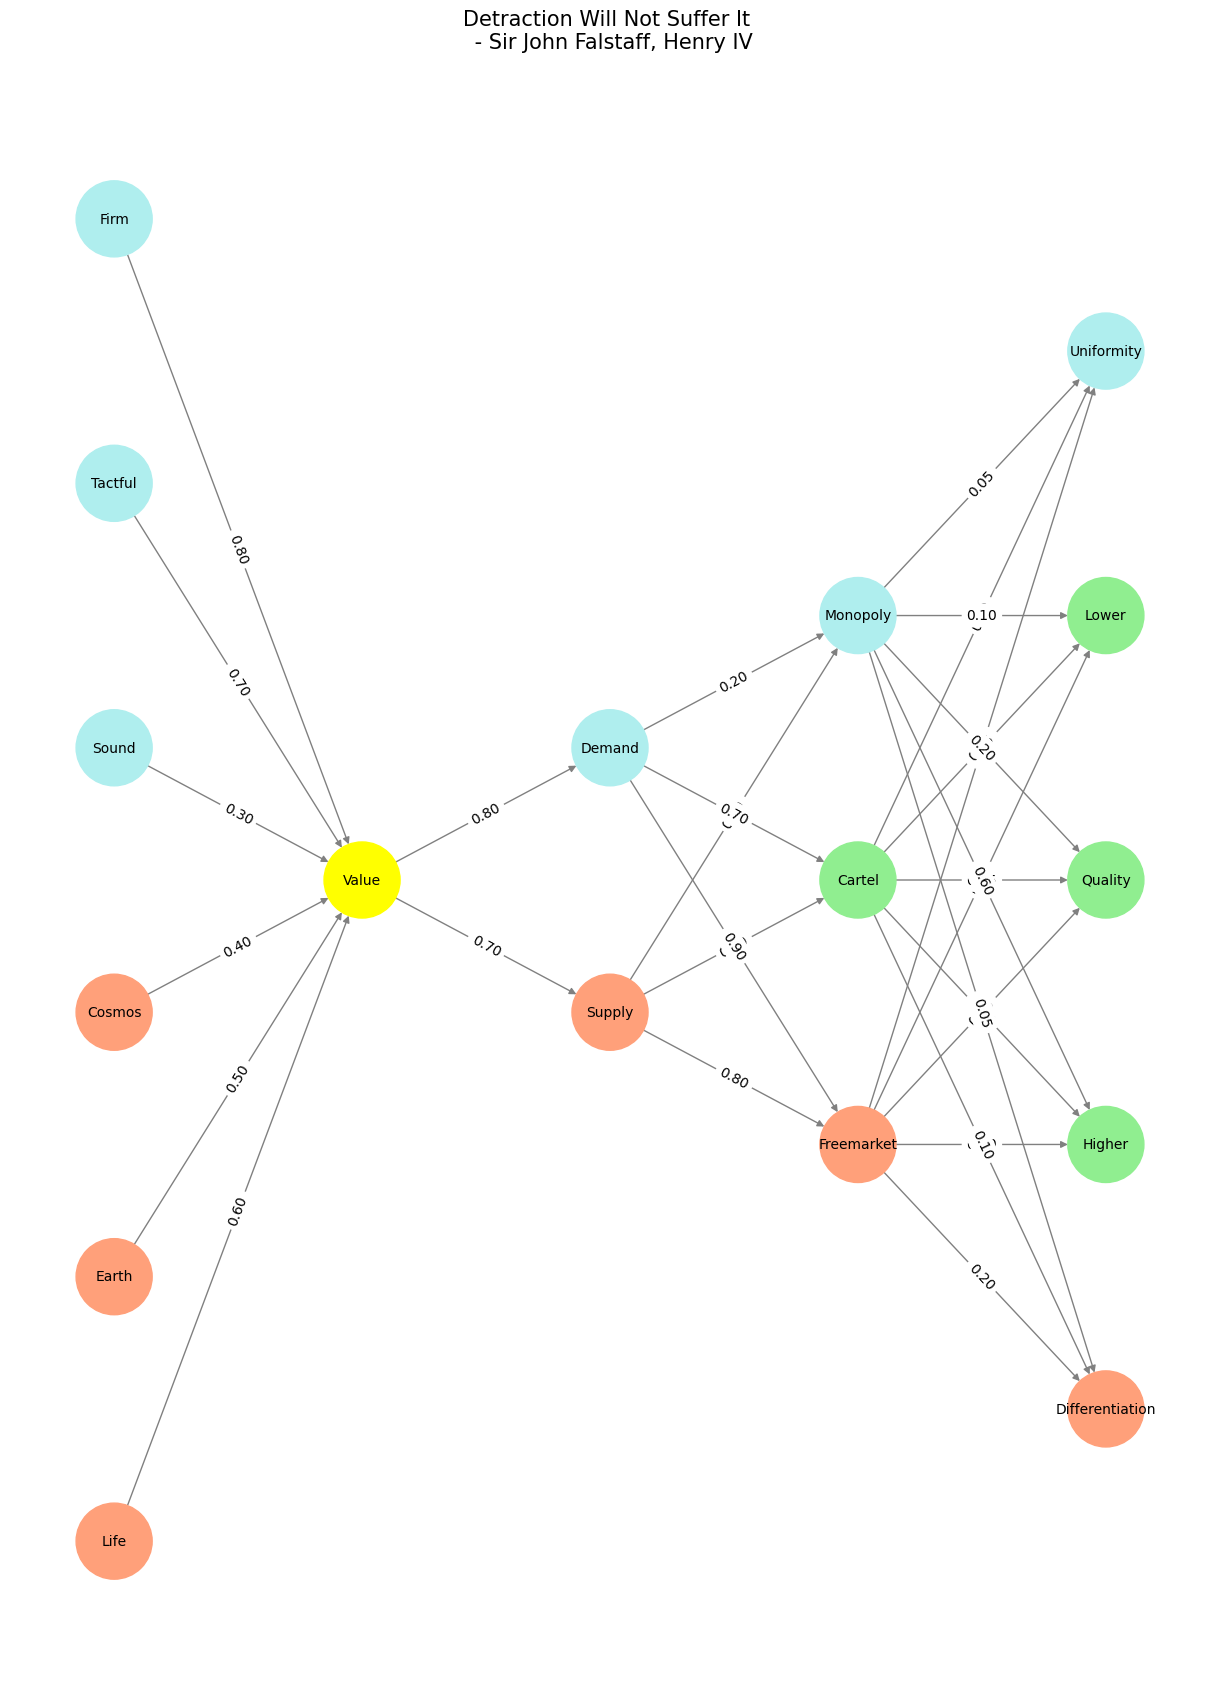

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Value'],
        'Input': ['Supply', 'Demand'],
        'Hidden': [
            'Freemarket',
            'Cartel',
            'Monopoly',
        ],
        'Output': ['Differentiation', 'Higher', 'Quality', 'Lower', 'Uniformity',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Value':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Demand':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Monopoly':
            return 'paleturquoise'
        elif node == 'Cartel':
            return 'lightgreen'
        elif node == 'Freemarket':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Uniformity':
            return 'paleturquoise'
        elif node in ['Lower', 'Quality', 'Higher']:
            return 'lightgreen'
        elif node == 'Differentiation':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Detraction Will Not Suffer It \n - Sir John Falstaff, Henry IV\n", fontsize=15)
    
    # Save the figure to a file
    plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

```{figure} figures/blanche.*
---
width: 1
height: 1
---
_Paul A. Samuelson_. One occassion of 70th Birthday Festschrift Conference
```

I measure a scholar’s prolific-ness not by the mere number of his publishings. Just
as the area of a rectangle equals its width times its depth, the quality of a lifetime
accomplishment must weight each article by its novelties and wisdoms. Harold Hotelling
had to his credit only about a dozen important economic papers. But their quality
guaranteed him permanent fame. Jagdish Bhagwati is more like Haydn: a composer of
more than a hundred symphonies and no one of them other than top notch.



```{figure} https://upload.wikimedia.org/wikipedia/commons/8/8c/Paul_A._Samuelson%2C_economist%2C_edited.jpg
---
width: 100%
height: 100%
---
Paul Anthony Samuelson did more than any other contemporary economist to raise the level of scientific analysis in economic theory
```

However, in closing I turn away from any vanities of career accomplishments to
substance. In the struggle to improve the lot of mankind, whether located in advanced
economies or in societies climbing the ladder out of poverty, Jagdish Bhagwati has been
a tireless partisan of that globalization which elevates global total-factor-productivities
both of richest America and poorest regions of Asia and Africa. It must be a special
source of satisfaction that a native of once stagnant India should have been able to play so
important a role in the realm of theory and normative policy.

Hail Solon! Hail Apollo! Hail Bhagwati!